In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from specim_test.specim.specfuncs import spec2d
from specim.specfuncs import spec1d
from astropy.io import fits as pf

In [2]:
file_loc = '../galaxy_spectra/LRIS_red_data_201213/keck_lris_red_A/Science/*'

In [16]:
xtrim_list = [[684, 768], [800, 875], [910, 955], [995, 1075], [1140, 1210], [1240, 1305],
              [1340, 1410], [1440, 1595]]
object_list = ['PS1_0028', 'PS1_0046', 'PS1_0095', 'PS1_0068', 'PS1_0134', 'PS1_0128', 'PS1_0159', 'PS1_0184']

In [3]:
file_list = []
for i,p in enumerate(glob.glob(file_loc)):
    if 'spec2d' in p and '0053m1' in p:
        file_list.append(p)
        frame = p.split('_')[-3][:5]
        #out_file.append('0053m1_r'+ frame + '_skysub.fits')

In [56]:
out_file = []
for i, p in enumerate(object_list):
    out_file.append([])
    for j, q in enumerate(file_list):
        frame = q.split('_')[-3][:5]
        if '26' not in frame:
            frame = frame[:4]
        outfile = 'spec1d_r_'+ p + '_' + frame + '.fits'
        out_file[i].append(outfile)

In [69]:
#%matplotlib notebook
for i, p in enumerate(object_list[0:1]):
    for j, q in enumerate(file_list[0:2]):
        spec = spec2d.Spec2d(q, hext=12, xtrim = xtrim_list[i],  transpose=True) #ytrim=[0, 3000],
        #spec.set_dispaxis('y')
        #spec.subtract_sky_2d()
        spec.szap()
        #profile = spec.spatial_profile(pixrange=[1100, 1200])
        spec.find_and_trace(stepsize=25, pixrange=[1100, 1200],
                            fitrange=[0, 3200], fitorder={'mean_1':2, 'stddev_1' : 2})
        spec.extract(outfile='0053m1_other_spectra/'+ out_file[i][j])



Loading file ../galaxy_spectra/LRIS_red_data_201213/keck_lris_red_A/Science/spec2d_r201213_0026a-0053m1_LRISr_2020Dec13T045626.045.fits
-----------------------------------------------
Read in 2-dimensional spectrum from ../galaxy_spectra/LRIS_red_data_201213/keck_lris_red_A/Science/spec2d_r201213_0026a-0053m1_LRISr_2020Dec13T045626.045.fits (HDU=12)
The input dataset was trimmed
 xrange: 684:769.  yrange: 0:4096
The input dataset was transposed
Final data dimensions (x y): 4096 x 85

Dispersion axis:              x
N_pixels along dispersion axis: 4096


sky model will be generated from data

 Spectrum Start:     0.00
 Spectrum End:     4095.00
 Dispersion (1st pixel):   1.00
 Dispersion (average):      1.00


From this point sky subtracted data will be used

From now cosmic ray rejected data will be used



TypeError: find_and_trace() got an unexpected keyword argument 'pixrange'


Loading file ../galaxy_spectra/LRIS_red_data_201213/keck_lris_red_A/Science/spec2d_r201213_0026b-0053m1_LRISr_2020Dec13T045626.045.fits
-----------------------------------------------
Read in 2-dimensional spectrum from ../galaxy_spectra/LRIS_red_data_201213/keck_lris_red_A/Science/spec2d_r201213_0026b-0053m1_LRISr_2020Dec13T045626.045.fits (HDU=12)
The input dataset was trimmed
 xrange: 684:769.  yrange: 0:4096
The input dataset was transposed
Final data dimensions (x y): 4096 x 85

Dispersion axis:              x
N_pixels along dispersion axis: 4096


sky model will be generated from data

 Spectrum Start:     0.00
 Spectrum End:     4095.00
 Dispersion (1st pixel):   1.00
 Dispersion (average):      1.00


From this point sky subtracted data will be used

From now cosmic ray rejected data will be used

Profile max value (before normalization) 12.500008


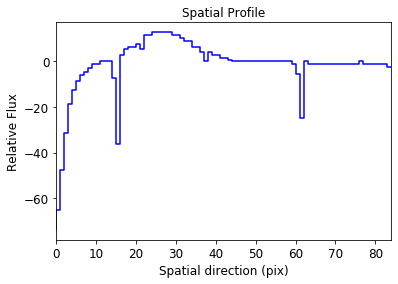

In [68]:
spec = spec2d.Spec2d(file_list[1], hext=12, xtrim = xtrim_list[0],  transpose=True) #ytrim=[0, 3000],
#spec.set_dispaxis('y')
#spec.subtract_sky_2d()
spec.szap()
profile = spec.spatial_profile()

In [ ]:
mod = spec.initial_model()

In [ ]:
spec.find_and_trace(stepsize=20,  fitorder={'mean_1':2, 'stddev_1' : 2}) #fitrange=[0,3900],

In [ ]:
spec.extract()

In [ ]:
%matplotlib notebook
plt.plot(spec.spec1d['wav'][:2500], spec.spec1d['flux'][:2500])

In [ ]:
spec.extract()

In [66]:
 sp = spec1d.Spec1d('0053m1_other_spectra/spec1d_r_PS1_0028_0026b.fits', informat='fits')


Reading spectrum from 0053m1_other_spectra/spec1d_r_PS1_0028_0026b.fits
Expected file format: fits

Could not read input file 0053m1_other_spectra/spec1d_r_PS1_0028_0026b.fits



OSError: 